# Regressão Logistica com Python

### Exemplo: Quem sobreviveria ao desastre do Titanic?

Neste exemplo iremos trabalhar com um conjunto de dados muito famoso sobre o desatre do Titanic [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). Nosso objetivo será prever uma classificação de sobrevivência ou morte.




<a href='https://pt.wikipedia.org/wiki/RMS_Titanic'>  <img src='titanic1-3200x1600.jpg' /></a>


Este dataset **"titanic_train.csv"** possui informações dispostas em colunas sobre os passageiros do Titanic:

* **Pclass**:  Classe da passagem (1 = 1st; 2 = 2nd; 3 = 3rd).
* **survival**:  Sobrevivente (0 = No; 1 = Yes).
* **name**:  Nome.
* **sex**:  Sexo.
* **age**:  Idade.
* **sibsp**:  Número de Irmãos/Cônjuge a bordo.
* **parch**:  Número de pais/filhos a bordo.
* **ticket**:  Número do *Ticket*.
* **fare**:  Valor do bilhete (libra esterlina).
* **cabin**: Cabine.
* **embarked**:  Porto de Embarcação (C = Cherbourg; Q = Queenstown; S = Southampton).

Preveja a sobrevivência do desastre do Titanic e se familiarize com os conceitos da Regressão Logística no Python para classificação.

# **Vamos começar!**



## Importando as bibliotecas


In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando os dados

Vamos começar lendo o arquivo titanic_train.csv em um dataframe do pandas.

In [399]:
train = pd.read_csv('titanic_train.csv')

In [400]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Análise exploratória de dados

Este *dataset* não está pronto para implementarmos um modelo de regressão logística, será necessário realizar a "limpeza dos dados".

Vamos começar uma análise de dados exploratória verificando os dados ausentes!

## Dados ausentes

Podemos criar um mapa de calor simples para verificar onde estão faltando dados.

<AxesSubplot:>

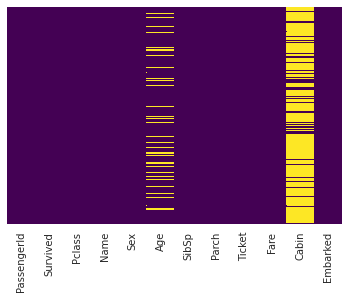

In [401]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Faltam cerca de 20% dos dados sobre a idade dos passageiros, coluna *Age*. Neste caso poderemos utilizar alguma técnica para o preenchimento destes dados com valores razoáveis. Já na a coluna *Cabin* estão faltando muitos dados para fazer algo útil em um nível básico. 

Vamos continuar visualizando um pouco mais dos dados! 

### Sobreviventes

#### Vamos classificar os sobrevientes: 
0. não sobreviveram
1. sobreviveram
                                       

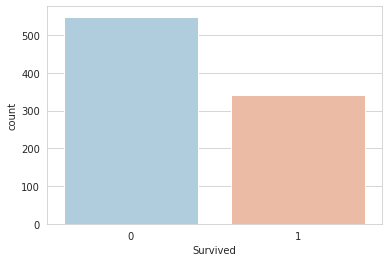

In [402]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')
plt.show()

#### Ampliando a análise com a divisão de sexo

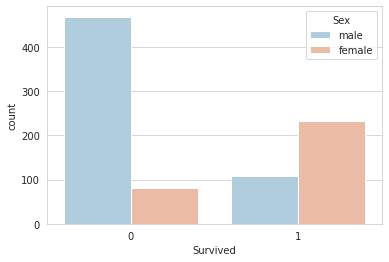

In [403]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

#### Verificando a relação entre os sobreviventes e a divisão por classe da passagem

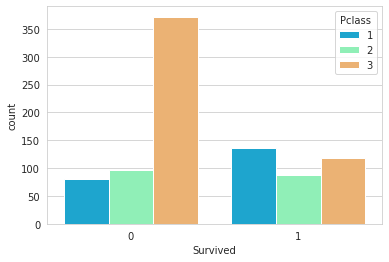

In [404]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

#### Gráfico da distribuição das idades dos passageiros

/home/artur/local/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


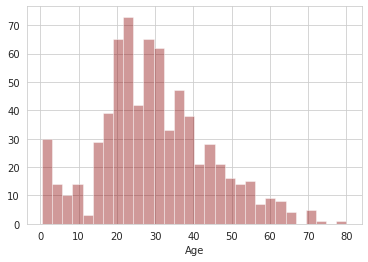

In [405]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

#### Os passageiros possuiam parentes no navio?

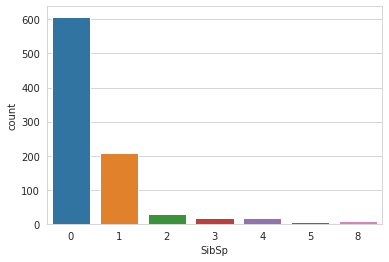

In [406]:
sns.countplot(x='SibSp',data=train)
plt.show()

#### Gráfico de distribuição dos valores dos *tickets*

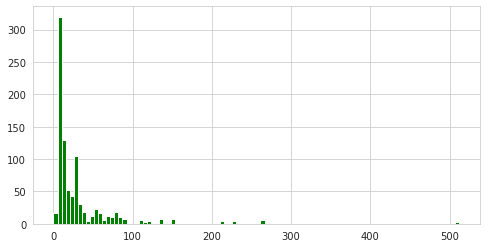

In [407]:
train['Fare'].hist(color='green',bins=100,figsize=(8,4))
plt.show()

___
## Limpeza de dados
Em vez de simplesmente não utilizar as linhas de dados de idade ausentes, iremos preenchê-los. Uma maneira inteligente de fazer isto, é  verificar a idade média por classe de passageiros. 

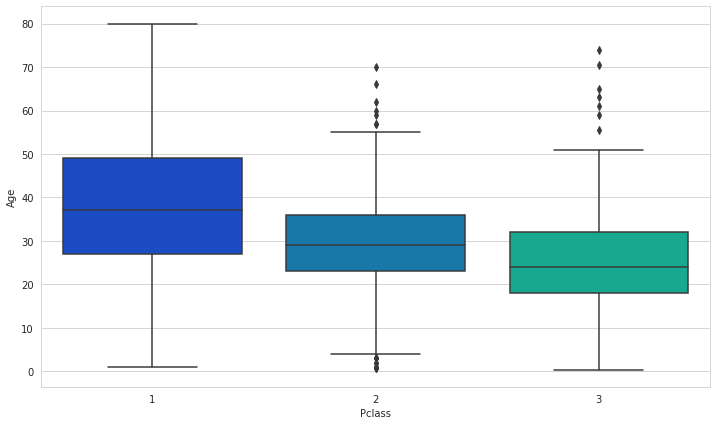

In [408]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

In [409]:
#Aprimorar Idade média com idade dos sobreviventes e não sobreviventes
def calc_idade(s,c):
    sob=train[train['Survived']==s]
    return sob[sob['Pclass']==c]['Age'].mean()
idades = np.zeros(shape=(3,2))
for c in range (1,4):
    for s in range(0,2):
        calc_idade(s,c)
        l[c-1,s] = calc_idade(s,c)
print(l)
#idades = [idade [sex,idade for s]

[[43.6953125  35.36819672]
 [33.54444444 25.90156627]
 [26.55555556 20.64611765]]


Podemos ver que os passageiros mais ricos das classes mais altas tendem a ser mais velhos, o que faz sentido. Usaremos esses valores médios de idade para prencher as idades *age*  com base nas classes *Pclass*.

In [410]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Survived = cols[2]
    
    if pd.isnull(Age):
        return l[int(Pclass-1),int(Survived)]
    else:
        return Age

#### Aplicando a função!

In [411]:
train['Age'] = train[['Age','Pclass','Survived']].apply(input_age,axis=1)

Agora vamos verificar novamente o mapa de calor.

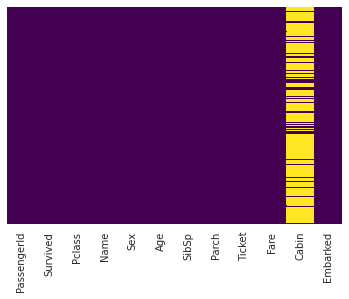

In [412]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### Retirando a coluna *Cabin* pelo fato de não existir muitos dados preenchidos.

In [413]:
train.drop('Cabin',axis=1,inplace=True)

In [414]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [415]:
train.dropna(inplace=True)

## Convertendo variáveis não numéricas

Precisamos converter não numéricas em variáveis *dummy* usando pandas! Caso contrário, nosso algoritmo de aprendizado de máquina não será capaz de utilizar essas variáveis como entradas.

In [416]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [417]:
#adicionar comprimento do nome
train['Nsize'] = train['Name'].str.len()
#Normalização dos valores numéricos
for col in ['Age','SibSp','Parch','Fare','Nsize','Pclass']:
    print('Normalização de {}'.format(col))
    mean=train[col].mean()
    std=train[col].std()
    print('mean: {}'.format(mean))
    print('std: {}\n'.format(std))
    train[col] = (train[col] - mean)/std

Normalização de Age
mean: 29.300901908814748
std: 13.28581041526076

Normalização de SibSp
mean: 0.5241844769403825
std: 1.1037048755969272

Normalização de Parch
mean: 0.38245219347581555
std: 0.8067607445174743

Normalização de Fare
mean: 32.09668087739029
std: 49.69750431670801

Normalização de Nsize
mean: 26.95838020247469
std: 9.276256869958136

Normalização de Pclass
mean: 2.3115860517435323
std: 0.8346997785705771



In [418]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [419]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True) #remove id tbm

In [420]:
train = pd.concat([train,sex,embark],axis=1)

In [421]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Nsize,male,Q,S
0,0,0.824744,-0.549526,0.431108,-0.474059,-0.499958,-0.426722,1,0,1
1,1,-1.571327,0.654766,0.431108,-0.474059,0.788503,2.591737,0,0,0
2,1,0.824744,-0.248453,-0.474932,-0.474059,-0.486376,-0.534524,0,0,1
3,1,-1.571327,0.428961,0.431108,-0.474059,0.422623,1.837122,0,0,1
4,0,0.824744,0.428961,-0.474932,-0.474059,-0.483861,-0.318920,1,0,1


In [422]:
train[['Pclass','Fare']].corr()

,Pclass,Fare
Pclass,1.000000,-0.548193
Fare,-0.548193,1.000000


Agora nossos dados estão prontos para o nosso modelo!



# Construindo um modelo de regressão logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de teste (há outro arquivo test.csv com o qual você pode brincar caso queira usar todos esses dados para treinamento).

## Separando os dados de treinamento e de validação

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Treinamento e previsão

In [425]:
from sklearn.linear_model import LogisticRegression

In [426]:
logmodel = LogisticRegression(solver='newton-cg',tol=0.1) #melhora com newton-cg ao invés de lbfgs
logmodel.fit(X_train,y_train)

LogisticRegression(solver='newton-cg', tol=0.1)

In [427]:
predictions = logmodel.predict(X_test)


## Avaliação do modelo

Podemos verificar as métricas de avaliação: *precision, recall e f1-score.*

In [461]:
from sklearn.metrics import classification_report

In [462]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       163
           1       0.87      0.69      0.77       104

    accuracy                           0.84       267
   macro avg       0.85      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



#### Sugestões: *manipular as outras variáveis do dataset*

In [463]:
### Importando o dataset de teste

In [464]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

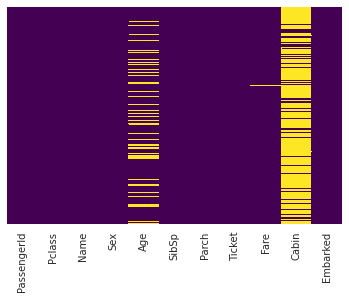

In [465]:
#verificando o data set
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

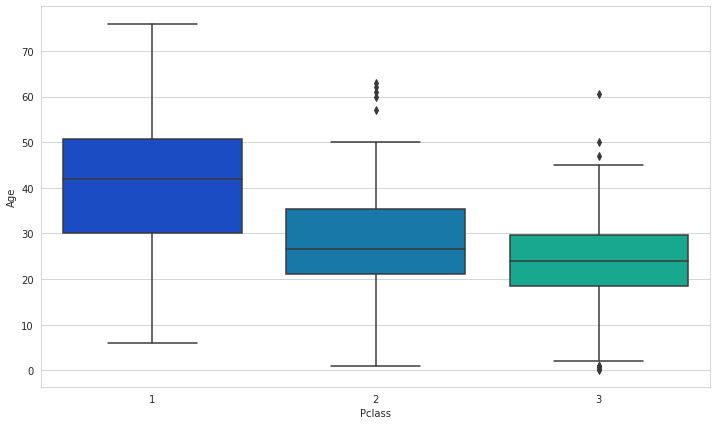

In [466]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')
plt.show()

In [467]:
def input_age2(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return (l[int(Pclass-1),0] + l[int(Pclass-1),0])/2
    else:
        return Age

In [468]:
test['Age'] = test[['Age','Pclass']].apply(input_age2,axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.dropna(inplace=True)

In [469]:
#adicionar comprimento do nome
test['Nsize'] = test['Name'].str.len()
#Normalização dos valores numéricos
for col in ['Age','SibSp','Parch','Fare','Nsize','Pclass']:
    print('Normalização de {}'.format(col))
    mean=test[col].mean()
    std=test[col].std()
    print('mean: {}'.format(mean))
    print('std: {}\n'.format(std))
    test[col] = (test[col] - mean)/std


Normalização de Age
mean: 29.88724228950169
std: 12.809676110094854

Normalização de SibSp
mean: 0.44844124700239807
std: 0.8975681445237608

Normalização de Parch
mean: 0.3932853717026379
std: 0.9824190109514219

Normalização de Fare
mean: 35.6271884892086
std: 55.90757617997383

Normalização de Nsize
mean: 27.50599520383693
std: 9.97234577806469

Normalização de Pclass
mean: 2.26378896882494
std: 0.8420773498029137



In [470]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [471]:
test.drop(['PassengerId','Sex','Embarked','Ticket'],axis=1,inplace=True) #remove id tbm

In [472]:
test = pd.concat([test,sex,embark],axis=1)

<AxesSubplot:>

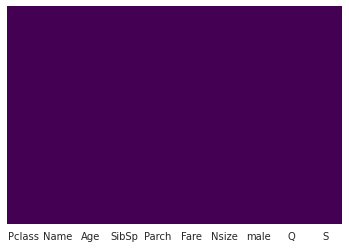

In [473]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [475]:
x_treina = train.drop('Survived',axis=1)
y_treina = train['Survived']
x_teste = test.drop('Name',axis=1)

In [476]:
logmodel = LogisticRegression(solver='newton-cg',tol=0.1) #melhora com newton-cg ao invés de lbfgs
logmodel.fit(x_treina,y_treina)

LogisticRegression(solver='newton-cg', tol=0.1)

In [477]:
predictions = logmodel.predict(X_test)

In [478]:
print("Total de sobreviventes estimados: {}".format(sum(predictions)+train['Survived'].sum()))

Total de sobreviventes estimados: 425
